## populacao_nas_aproximidades.ipynb

- Esse py notebook irá fazer uma estimativa da quantidade de pessoas que moram ao redor de praças específicas na cidade de Porto Velho - RO num raio de 1 quilômetro

In [155]:
# Imports padrões para o trabalho
import pandas as pd
import geopandas as gpd

# Importando o geocodificador e configurando:

# Geocodificador do GeoPandas
from geopandas.tools import geocode

# Alterando o user agent do geopy para utilizar o OSM sem problemas
from geopy.geocoders import options

options.default_user_agent = "My_Pycharm_Professional"

#Importando o geocodificador do Open Street Maps
from geopy.geocoders import Nominatim

### Carregando os dados censitários de população - 2010

In [156]:
populacao_censitaria_pvh = gpd.read_file('Dados/densidade_populacional/Output/setor_censitario_censo_pvh.shp')
populacao_censitaria_pvh.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,Cod_distri,Nome_do_di,Cod_bairro,Nome_do_ba,Populacao,geometry
0,17215,110020505090014,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205060,Igarapé,212.0,"POLYGON ((-63.84842 -8.74327, -63.84774 -8.746..."
1,17216,110020505090015,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205060,Igarapé,256.0,"POLYGON ((-63.85043 -8.74776, -63.85004 -8.749..."
2,17217,110020505090016,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205060,Igarapé,226.0,"POLYGON ((-63.85771 -8.74263, -63.85754 -8.743..."
3,17218,110020505090017,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205060,Igarapé,142.0,"POLYGON ((-63.85506 -8.74205, -63.85482 -8.743..."
4,17219,110020505090018,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205060,Igarapé,279.0,"POLYGON ((-63.86224 -8.74364, -63.86185 -8.745..."


### Geocodificar as praças

In [157]:
pracas = pd.read_csv('Dados/populacao_nas_aproximidades/pracas_portovelho.csv', sep=';')
pracas.head()

,Local,Endereço
0,Santo Antônio,Praça do Conjunto Santo Antônio Porto Velho
1,Baú,Praça Marechal Rondon Porto Velho
2,Contorno,Praça Do Contorno Porto Velho
3,Três Caixas d'Água,Praça das Três Caixas d'Água Porto Velho


In [158]:
pracas_geocodificado = geocode(pracas.loc[:, 'Endereço'], provider=Nominatim)
pracas_geocodificado.head()

,geometry,address
0,POINT (-63.89813 -8.74522),"Praça do Conjunto Santo Antônio, São João Bosc..."
1,POINT (-63.90599 -8.76586),"Praça Marechal Rondon, Centro, Porto Velho, Re..."
2,POINT (-63.87455 -8.74505),"Praça do contorno, Flodoaldo Pontes Pinto, Por..."
3,POINT (-63.90740 -8.76252),"Praça das Três Caixas D´Água, Caiarí, Porto Ve..."


merge do csv das pracas com a geocodificacao

In [159]:
pracas_geocodificado = pracas_geocodificado.merge(pracas.Local, left_index=True, right_index=True)

In [160]:
pracas_geocodificado

,geometry,address,Local
0,POINT (-63.89813 -8.74522),"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio
1,POINT (-63.90599 -8.76586),"Praça Marechal Rondon, Centro, Porto Velho, Re...",Baú
2,POINT (-63.87455 -8.74505),"Praça do contorno, Flodoaldo Pontes Pinto, Por...",Contorno
3,POINT (-63.90740 -8.76252),"Praça das Três Caixas D´Água, Caiarí, Porto Ve...",Três Caixas d'Água


### Criando o buffer de 1km

In [161]:
pracas_geocodificado.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

EPSG:31980
SIRGAS 2000 / UTM zone 20S

In [162]:
pracas_geocodificado.to_crs(epsg=31980, inplace=True)
pracas_geocodificado.crs

<Derived Projected CRS: EPSG:31980>
Name: SIRGAS 2000 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 66°W and 60°W, northern and southern hemispheres. In remainder of South America - between 66°W and 60°W, southern hemisphere, onshore and offshore.
- bounds: (-66.0, -58.39, -60.0, 5.28)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [163]:
pracas_geocodificado['buffer'] = pracas_geocodificado.buffer(1000)
pracas_geocodificado.head(1)

,geometry,address,Local,buffer
0,POINT (401210.802 9033197.353),"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9..."


Para facilitar o código, troco a geometria pelo buffer

In [164]:
pracas_geocodificado.drop(columns='geometry', inplace=True)
pracas_geocodificado.rename(columns={'buffer': 'geometry'}, inplace=True)

pracas_geocodificado.head(1)

,address,Local,geometry
0,"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9..."


Verificar crs das duas GDF

In [165]:
pracas_geocodificado.crs == populacao_censitaria_pvh.crs

False

In [166]:
populacao_censitaria_pvh.to_crs(epsg=31980, inplace=True)

In [167]:
pracas_geocodificado.crs == populacao_censitaria_pvh.crs

True

Junção espacial onde irei pegar apenas os setores censitários que estiverem dentro do buffer

In [168]:
populacao_pracas_1km = pracas_geocodificado.sjoin(populacao_censitaria_pvh, how='inner', predicate='contains')
populacao_pracas_1km.head()

,address,Local,geometry,index_right,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,...,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,Cod_distri,Nome_do_di,Cod_bairro,Nome_do_ba,Populacao
0,"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9...",112,17986,110020505060035,URBANO,110020505009,São João Bosco,11002050506,...,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205009,São João Bosco,202.0
0,"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9...",113,17987,110020505060036,URBANO,110020505009,São João Bosco,11002050506,...,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205009,São João Bosco,295.0
0,"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9...",116,17990,110020505060039,URBANO,110020505009,São João Bosco,11002050506,...,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205009,São João Bosco,273.0
0,"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9...",115,17989,110020505060038,URBANO,110020505009,São João Bosco,11002050506,...,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205009,São João Bosco,203.0
0,"Praça do Conjunto Santo Antônio, São João Bosc...",Santo Antônio,"POLYGON ((402210.802 9033197.353, 402205.987 9...",119,17993,110020505060042,URBANO,110020505008,Liberdade,11002050506,...,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,110020505,PORTO VELHO,1100205008,Liberdade,265.0


Descrição da coluna população

In [169]:
grp_populacao_pracas_1km = populacao_pracas_1km.groupby('address')
grp_populacao_pracas_1km.Populacao.describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
"Praça Marechal Rondon, Centro, Porto Velho, Região Geográfica Imediata de Porto Velho, Região Geográfica Intermediária de Porto Velho, Rondônia, Região Norte, Brasil",8.0,110.750000,63.856424,53.0,69.0,101.5,119.25,253.0
"Praça das Três Caixas D´Água, Caiarí, Porto Velho, Região Geográfica Imediata de Porto Velho, Região Geográfica Intermediária de Porto Velho, Rondônia, Região Norte, Brasil",5.0,87.400000,25.735190,53.0,72.0,88.0,109.00,115.0
"Praça do Conjunto Santo Antônio, São João Bosco, Porto Velho, Região Geográfica Imediata de Porto Velho, Região Geográfica Intermediária de Porto Velho, Rondônia, Região Norte, Brasil",7.0,238.714286,38.352376,202.0,205.0,226.0,269.00,295.0
"Praça do contorno, Flodoaldo Pontes Pinto, Porto Velho, Região Geográfica Imediata de Porto Velho, Região Geográfica Intermediária de Porto Velho, Rondônia, Região Norte, Brasil",8.0,256.375000,46.726981,193.0,232.0,252.5,279.25,336.0


### Plotando

In [170]:
import matplotlib.pyplot as plt
import contextily as cx

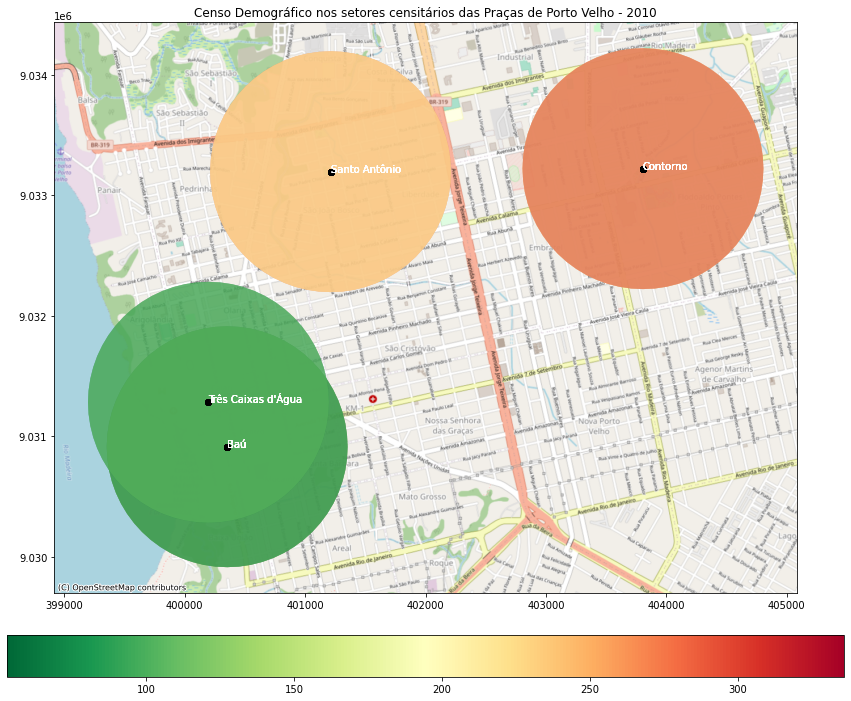

In [171]:
figura, eixo = plt.subplots(figsize=(15, 15))

# plt.xlim(-63.925, -63.8)
# plt.ylim(-8.820, -8.7)
plt.title('Censo Demográfico nos setores censitários das Praças de Porto Velho - 2010')
#
# eixo.legend(bbox_to_anchor=(1.05, 1),
#                          loc='upper left', borderaxespad=0.)

populacao_pracas_1km.plot(ax=eixo,
                          alpha=0.3,
                          column='Populacao',
                          cmap='RdYlGn_r',
                          vmax=populacao_pracas_1km.Populacao.max(),
                          vmin=populacao_pracas_1km.Populacao.min(),
                          legend=True,
                          legend_kwds={'orientation': 'horizontal', 'anchor': (0.5, 2.0)}
                          )

# eixo.legend(handles=populacao_pracas_1km.Local.unique())

populacao_pracas_1km.centroid.plot(ax=eixo, color='black')

for index, praca in populacao_pracas_1km.iterrows():
    plt.annotate(text=praca.Local,
                 xy=(praca.geometry.centroid.x, praca.geometry.centroid.y), horizontalalignment='left', color='white')

cx.add_basemap(ax=eixo, crs=populacao_pracas_1km.crs, zoom=15, source=cx.providers.OpenStreetMap.Mapnik)